## Игитова А М80-408Б-18

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [86]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

Ссылка на датасет: https://www.kaggle.com/mokar2001/ascvd-heart-risk. Задача - определить риск того что у человека сердечная болезнь по некоторым признакам(курение, пол, раса и тд).

In [49]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [87]:
data = pd.read_csv('heartRisk.csv')
print(data.shape)
print(data.isna().sum())
data.head()


(1000, 10)
isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64


,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [89]:
x = data.drop(columns=['Risk'])
y = data['Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
x_train_scaled[0]

array([ 1.04605967,  0.92295821,  0.97286794,  0.94406194,  1.00752834,
        1.19496998, -0.50446914, -1.61580528,  0.20877162])

In [92]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
isMale,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
isBlack,1000.0,0.530,0.499349,0.0,0.0,1.0,1.0,1.0
isSmoker,1000.0,0.516,0.499994,0.0,0.0,1.0,1.0,1.0
isDiabetic,1000.0,0.522,0.499766,0.0,0.0,1.0,1.0,1.0
isHypertensive,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
Age,1000.0,59.107,11.536492,40.0,49.0,59.0,69.0,79.0
Systolic,1000.0,144.249,31.774528,90.0,117.0,144.0,171.0,200.0
Cholesterol,1000.0,164.043,20.329891,130.0,146.0,164.0,182.0,200.0
HDL,1000.0,59.603,23.863505,20.0,39.0,59.0,81.0,100.0
Risk,1000.0,19.667,17.043941,0.1,6.3,14.4,29.0,85.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32e1931a60>,
      dtype=object)

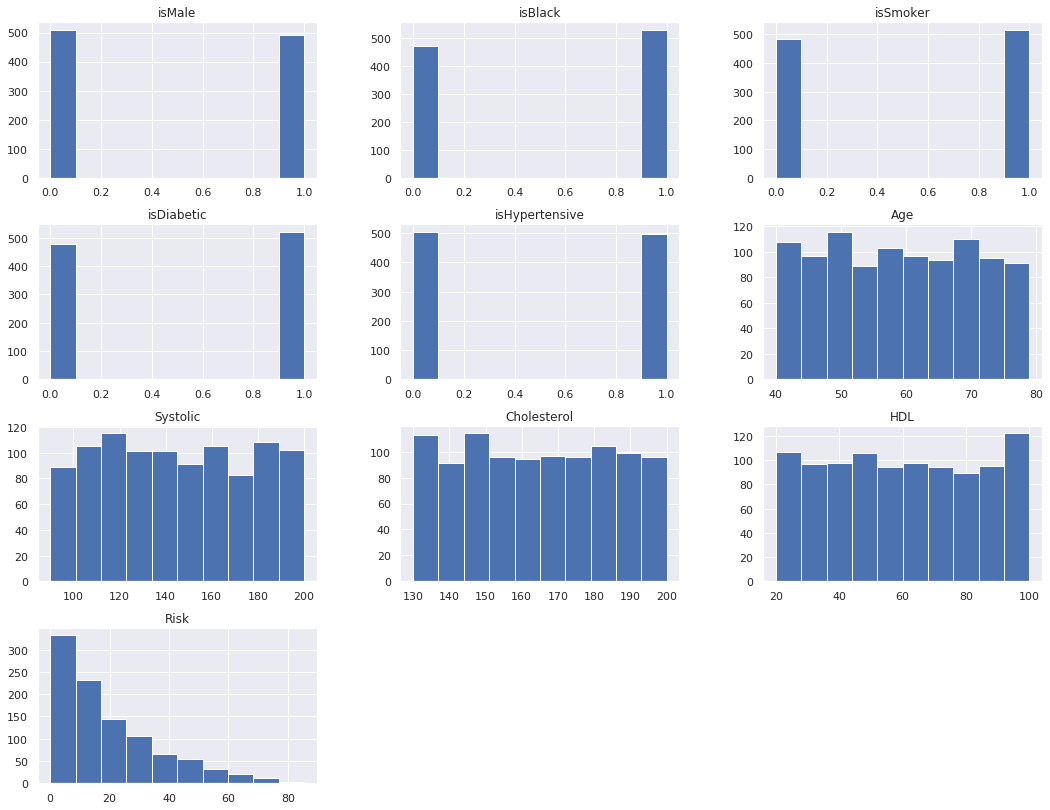

In [94]:
data.hist(figsize=(18, 14))

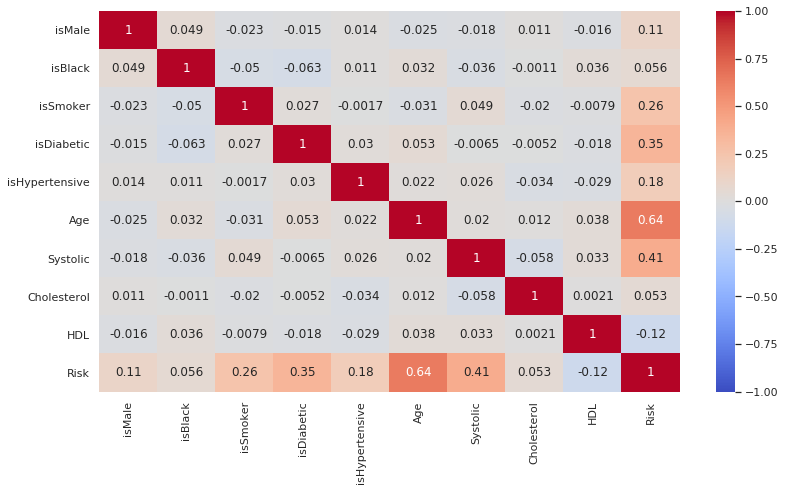

In [95]:
corr = data.corr()
sns.set(rc = {'figure.figsize':(13, 7)})
sns.heatmap(
    corr,
    annot=True, cmap='coolwarm',
    vmin=-1, vmax=1)

In [96]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 
def r_squared(estimator, x, y_true):
  y = estimator.predict(x)
  return 1 - ((y - y_true) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum()

Я выбрала метрику качества R^2, т.к. она хорошо демонстрирует насколько хорошо модель описывает данные. По сути она является нормированной среднеквадратической ошибкой. Еще она используется в методе score для линейной регресии из sklearn, поэтому вопрос удобства так же повлиял на выбор.

In [97]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [98]:
class MyLinearRegressor:
  def __init__(self):
    self.loss = []
    self.test_loss = []
    self.axis_x = []

  def fit(self, x, y, epoch=1000, lr=0.03, loss_flag=False, x_test=None, y_test=None):
    self.weights = np.random.rand(x.shape[1] + 1)
    x = np.insert(x, 0, 1, axis=1)
    m = x.shape[0]
    if x_test is not None:
        x_test = np.insert(x_test, 0, 1, axis=1)
    for _ in range(epoch):
      predicted = self.predict(x)
      self.weights -= lr * np.dot(predicted - y, x) / m
      if loss_flag:
          self.axis_x.append(_)
          self.loss.append(self.score(x, y))
          if x_test is not None and y_test is not None:
              self.test_loss.append(self.score(x_test, y_test))

  def predict(self, x):
    if self.weights.shape[0] != x.shape[1]:
      x = np.insert(x, 0, 1, axis=1)
    return np.dot(x, self.weights)

  def score(self, x, y):
    return r_squared(self, x, y)  

In [99]:
model = MyLinearRegressor()
model.fit(x_train_scaled, y_train, epoch=5000)

In [100]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn
class MyLinearRegressor2:
  def __init__(self):
    self.loss = []
    self.test_loss = []
    self.axis_x = []

  def fit(self, x, y, epoch=1000, lr=0.03, loss_flag=False, x_test=None, y_test=None, coef=0):
    self.weights = np.random.rand(x.shape[1] + 1)
    x = np.insert(x, 0, 1, axis=1)
    m = x.shape[0]
    if x_test is not None:
        x_test = np.insert(x_test, 0, 1, axis=1)
    for _ in range(epoch):
      predicted = self.predict(x)
      self.weights -= lr * np.dot(predicted - y, x) / m + lr * coef * np.sum(np.abs( self.weights )) / m
      if loss_flag:
          self.axis_x.append(_)
          self.loss.append(self.score(x, y))
          if x_test is not None and y_test is not None:
              self.test_loss.append(self.score(x_test, y_test))

  def predict(self, x):
    if self.weights.shape[0] != x.shape[1]:
      x = np.insert(x, 0, 1, axis=1)
    return np.dot(x, self.weights)

  def score(self, x, y):
    return r_squared(self, x, y)  

In [101]:
model2 = MyLinearRegressor2()
model2.fit(x_train_scaled, y_train, epoch=5000)

In [102]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [103]:
print('R^2 value on train: ' + str(model.score(x_train_scaled, y_train)))
print('R^2 value on test: ' + str(model.score(x_test_scaled, y_test)))
print('Resulting weights: ' + str(model.weights))

R^2 value on train: 0.7914182151833765
R^2 value on test: 0.8105728965056821
Resulting weights: [19.7965      2.10848877  1.1979419   4.44676683  5.25263937  2.43123361
 10.45925472  6.91080906  1.39245875 -2.44537099]


In [104]:
print('R^2 value on train: ' + str(model2.score(x_train_scaled, y_train)))
print('R^2 value on test: ' + str(model2.score(x_test_scaled, y_test)))
print('Resulting weights: ' + str(model2.weights))

R^2 value on train: 0.7914182151833765
R^2 value on test: 0.8105728965056821
Resulting weights: [19.7965      2.10848877  1.1979419   4.44676683  5.25263937  2.43123361
 10.45925472  6.91080906  1.39245875 -2.44537099]


In [107]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

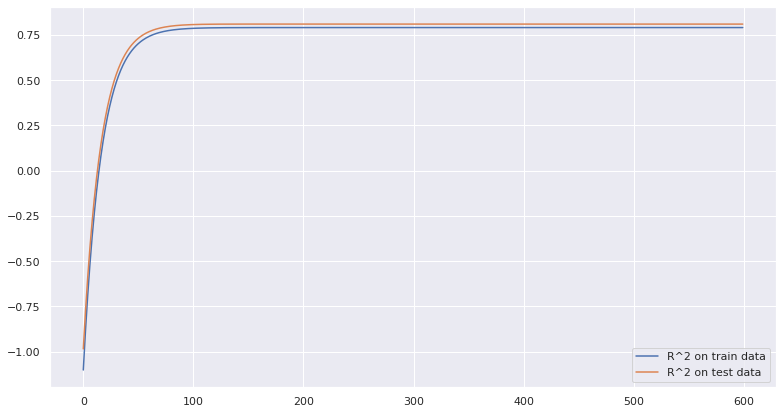

In [105]:
model = MyLinearRegressor()
model.fit(x_train_scaled, y_train, epoch=600, loss_flag=True, x_test=x_test_scaled, y_test=y_test)
plt.plot(model.axis_x, model.loss, label='R^2 on train data')
plt.plot(model.axis_x, model.test_loss, label='R^2 on test data' )
plt.legend()


In [109]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [106]:
from sklearn.linear_model import Ridge
# при альфа равный 0 Ridge является линейной регрессией
sklearn_model = Ridge(alpha=0, max_iter=1000)
sklearn_model.fit(x_train_scaled, y_train)
print('R^2 value on train: ' + str(sklearn_model.score(x_train_scaled, y_train)))
print('R^2 value on test: ' + str(sklearn_model.score(x_test_scaled, y_test)))
print('Resulting weights: ' + str(sklearn_model.coef_))

R^2 value on train: 0.7914182151833765
R^2 value on test: 0.8105728965056821
Resulting weights: [ 2.10848877  1.1979419   4.44676683  5.25263937  2.43123361 10.45925472
  6.91080906  1.39245875 -2.44537099]


В реализации линейной регресии из sklearn коэфициенты подбираются аналитически. В моей реализации коэфициенты подбираются итеративно градиентным спуском для обучения. В моей модели весов на 1 больше, потому что, sklearn, видимо, не использует смещение.

In [107]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

/home/magomed/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/magomed/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/magomed/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/magomed/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/magomed/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The m

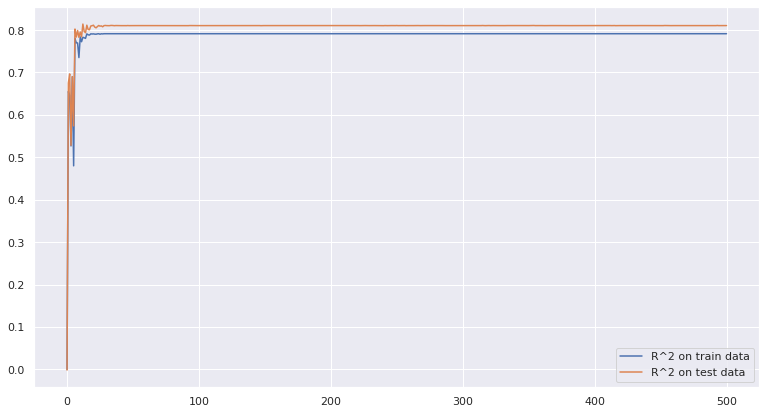

In [108]:
sklearn_test_loss = []
sklearn_train_loss = []
for i in range(500 + 1):
  sklearn_model_for_plot = Ridge(alpha=0, max_iter=i, solver='sag')
  sklearn_model_for_plot.fit(x_train_scaled, y_train)
  sklearn_train_loss.append(sklearn_model_for_plot.score(x_train_scaled, y_train))
  sklearn_test_loss.append(sklearn_model_for_plot.score(x_test_scaled, y_test))
plt.plot(sklearn_train_loss, label='R^2 on train data')
plt.plot(sklearn_test_loss, label='R^2 on test data' )
plt.legend()  